# Biodiversity in National Parks

For this project, we will interpret data from the National Parks Service about endangered species in different parks.

We will perform some data analysis on the conservation statuses of these species and investigate if there are any patterns or themes to the types of species that become endangered. During this project, we will analyze, clean up, and plot data as well as pose questions and seek to answer them in a meaningful way.

In [115]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency

# Data Exploring

In [51]:
species = pd.read_csv('species_info.csv')
print(species.info())
print(species.conservation_status.unique())
print(species.category.unique())
print(species[species.category == 'Mammal'].conservation_status.value_counts())
species.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None
[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
Species of Concern    28
Endangered             7
Threatened             2
In Recovery            1
Name: conservation_status, dtype: int64


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [42]:
observation = pd.read_csv('observations.csv')
print(observation.info())
observation.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


It seems like the conservation_status is nan for all the speciescwhich are normal or with no information because all the other values are 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery' .

# Data Cleaning

In [84]:
# Replacing nan with normal
species.conservation_status = species.conservation_status.fillna(value ='No Information')
print(species.info())
print(species.conservation_status.unique())
print(species[species.category == 'Mammal'][species.conservation_status == 'Threatened'])

species.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  5824 non-null   object
dtypes: object(4)
memory usage: 182.1+ KB
None
['No Information' 'Species of Concern' 'Endangered' 'Threatened'
 'In Recovery']
     category          scientific_name  \
38     Mammal   Myotis septentrionalis   
3032   Mammal  Ursus arctos horribilis   

                                  common_names conservation_status  
38    Northern Long-Eared Bat, Northern Myotis          Threatened  
3032                              Grizzly Bear          Threatened  


<ipython-input-84-af4ae4784b57>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(species[species.category == 'Mammal'][species.conservation_status == 'Threatened'])


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Information
1,Mammal,Bos bison,"American Bison, Bison",No Information
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Information
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Information
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Information


In [100]:
# dividing the dataset into Protected and not protected
species_notpro = species[species.conservation_status == 'No Information']
species_pro = species[species.conservation_status != 'No Information']

# Data Visualization

### Visualization 1

What is the distribution of conservation_status for animals?

Text(0.5, 1.0, 'Conservation Status of Mammal')

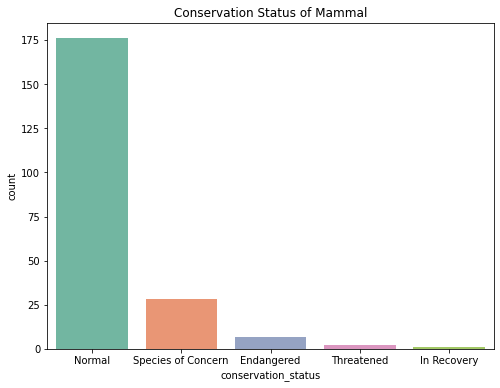

In [44]:
plt.figure(figsize=(8,6))
sns.set_palette('Set2')
sns.countplot(x=species[species.category == 'Mammal'].conservation_status)
plt.title('Conservation Status of Mammal')

# Analysis

Out of 214 Mammals in our Dataset there are 176 normal , 28 Species of Concern ,7 Endangered ,2 Threatened
(Northern Long-Eared Bat, Northern Myotis) ,   1 in Recovery (Canis lupus or Gray Wolf)  species.

## Visualization 2

Are certain types of species more likely to be endangered?

[Text(0.5, 0, 'Classes'),
 Text(0, 0.5, 'Number of observations'),
 Text(0.5, 1.0, 'In Recovery')]

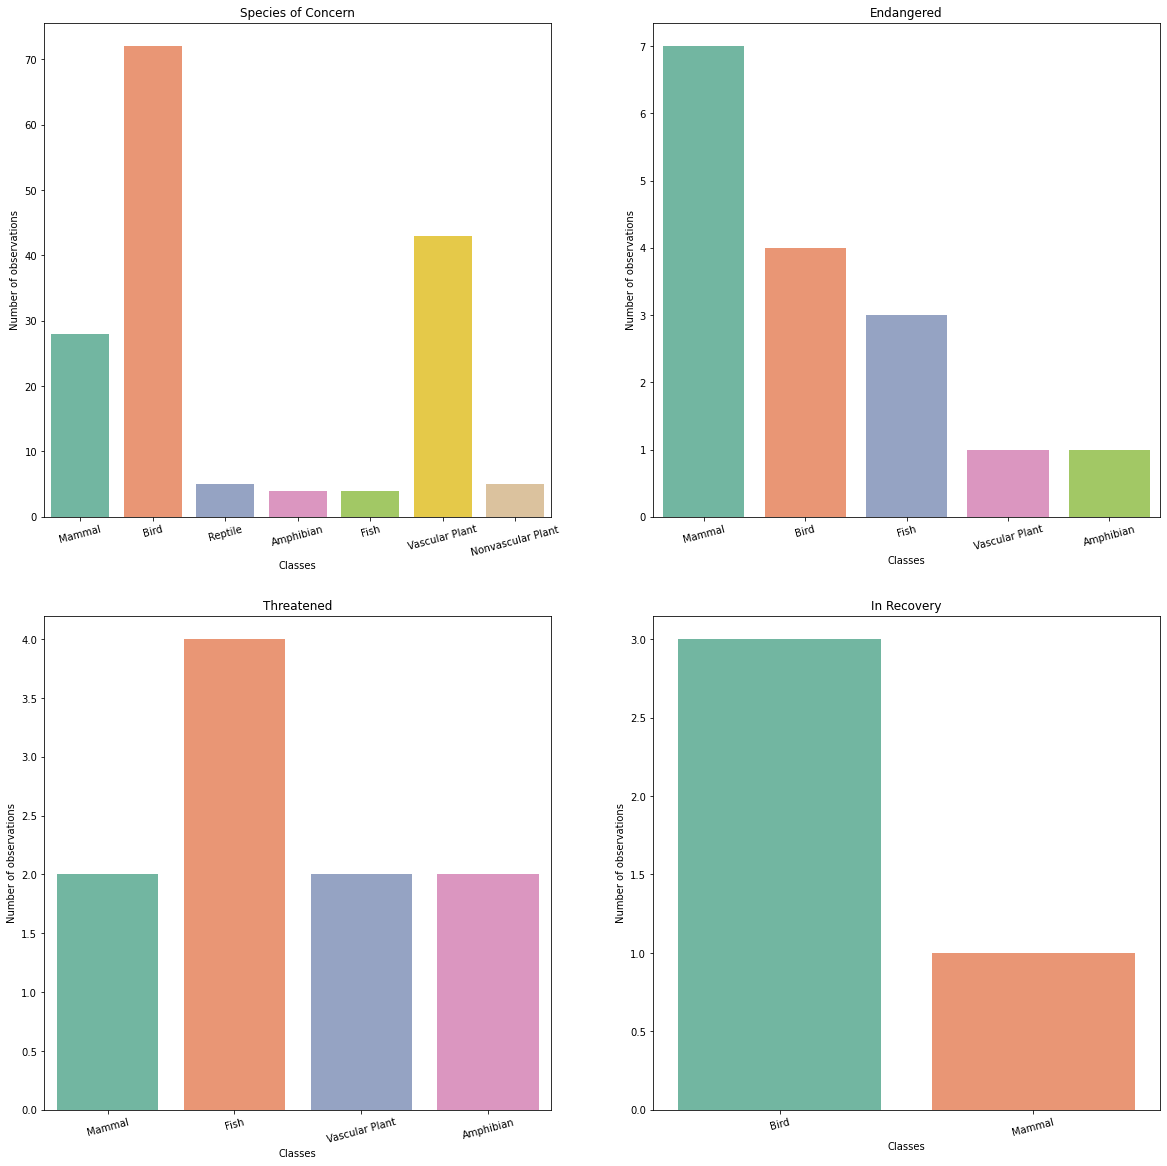

In [89]:

df1 = species[species.conservation_status =='Species of Concern']
df2 = species[species.conservation_status == 'Endangered']
df3 = species[species.conservation_status == 'Threatened']
df4 = species[species.conservation_status == 'In Recovery']

plt.figure(figsize= (20,20))

ax1 = plt.subplot(2,2,1)
ax1= sns.countplot(x=df1.category)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 15)
ax1.set(xlabel = 'Classes', ylabel = 'Number of observations', title = 'Species of Concern')

ax2 = plt.subplot(2,2,2)
ax2 = sns.countplot(x=df2.category)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 15)
ax2.set(xlabel = 'Classes', ylabel = 'Number of observations', title = 'Endangered')

ax3 = plt.subplot(2,2,3)
ax3=sns.countplot(x=df3.category)
ax3.set_xticklabels(ax3.get_xticklabels(),rotation = 15)
ax3.set(xlabel = 'Classes', ylabel = 'Number of observations', title = 'Threatened')

ax4 = plt.subplot(2,2,4)
ax4=sns.countplot(x=df4.category)
ax4.set_xticklabels(ax4.get_xticklabels(),rotation = 15)
ax4.set(xlabel = 'Classes', ylabel = 'Number of observations', title = 'In Recovery')


### Visualization 3

All Types of Species

Text(0.5, 1.0, 'Breakdown of the classes for observations of species at risk')

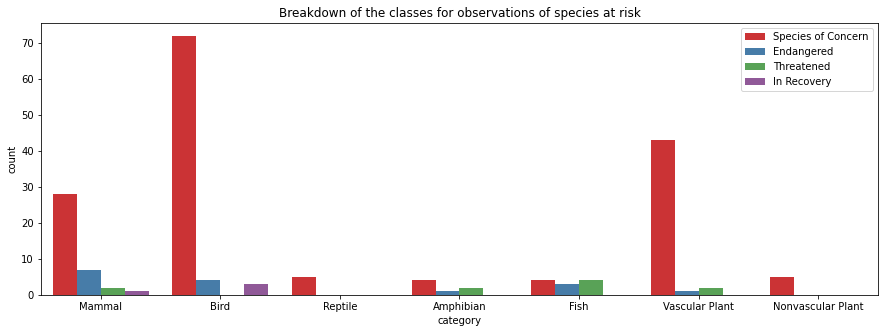

In [101]:
plt.figure(figsize=(15,5))
sns.set_palette('Set1')

sns.countplot(data = species_pro, x = 'category', hue = 'conservation_status')
plt.legend(loc = 'upper right')
plt.title('Breakdown of the classes for observations of species at risk')

In [102]:
#Merging both datasets
all_data_notpro = pd.merge(species_notpro,observation,on='scientific_name')

all_data_pro = pd.merge(species_pro,observation,on='scientific_name')
all_data_pro.head()


,category,scientific_name,common_names,conservation_status,park_name,observations
0,Mammal,Canis latrans,Coyote,Species of Concern,Bryce National Park,85
1,Mammal,Canis latrans,Coyote,Species of Concern,Yellowstone National Park,206
2,Mammal,Canis latrans,Coyote,Species of Concern,Great Smoky Mountains National Park,68
3,Mammal,Canis latrans,Coyote,Species of Concern,Yosemite National Park,99
4,Mammal,Canis lupus,Gray Wolf,Endangered,Yosemite National Park,35


## Visualization 4

Text(0.5, 1.0, 'Number of observations for each status, breaking it down by location')

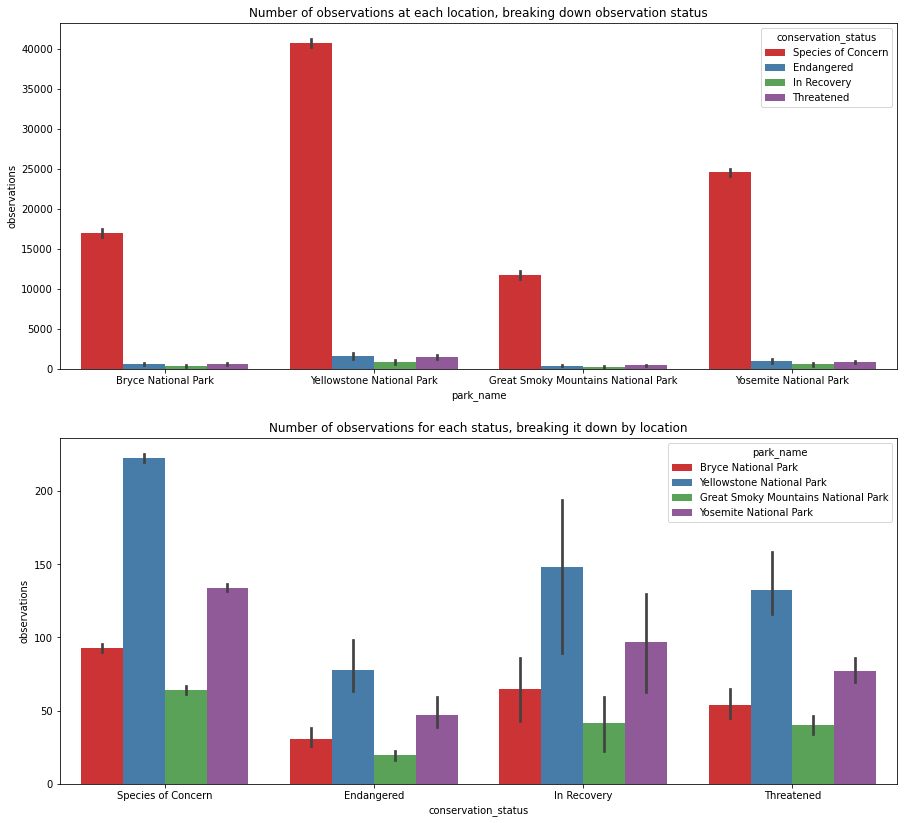

In [103]:
plt.figure(figsize=(15,14))
plt.subplot(2,1,1)
sns.barplot(data = all_data_pro, x = 'park_name', y = 'observations', hue = 'conservation_status', estimator = np.sum)
plt.title('Number of observations at each location, breaking down observation status')
plt.subplot(2,1,2)
sns.barplot(data = all_data_pro, x = 'conservation_status', y = 'observations', hue = 'park_name')
plt.title('Number of observations for each status, breaking it down by location')

## Visualization 5

Text(0.5, 1.0, 'Observations of Protected Specious')

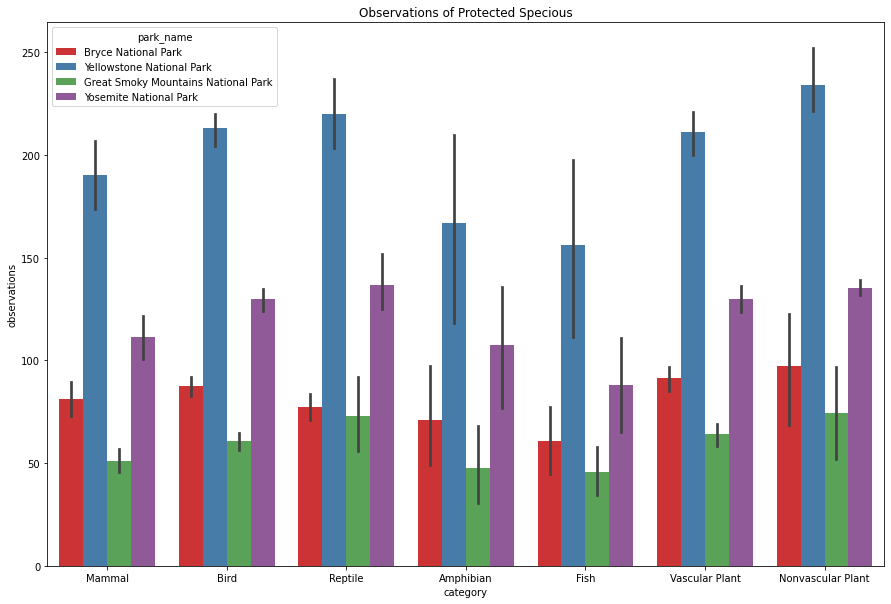

In [130]:
plt.figure(figsize=(15,10))
sns.barplot(y='observations',x='category',hue='park_name',data=all_data_pro)
plt.title('Observations of Protected Specious')

### Hypothesis

Now that we have a better understanding of the dataset and the information it contains, let's perform hypothesis testing for the following questions:

Are certain types of species more likely to be endangered?

Are the differences between species and their conservation status significant?


In [116]:
all_data_pro['Endangered'] = all_data_pro.conservation_status.apply(lambda x: 'Endangered' if x == 'Endangered' else 'Not Endangered')
xtab_endangered = pd.crosstab(all_data_pro.Endangered, all_data_pro.category)
print(xtab_endangered)
chi2, pval, dof, expected = chi2_contingency(xtab_endangered)
print('\n')
print(expected)
print('\n')
print('The p value for this chi square test is: {}'.format(pval))

category        Amphibian  Bird  Fish  Mammal  Nonvascular Plant  Reptile  \
Endangered                                                                  
Endangered              4    16    12      44                  0        0   
Not Endangered         24   332    36     188                 20       20   

category        Vascular Plant  
Endangered                      
Endangered                   4  
Not Endangered             180  


[[  2.54545455  31.63636364   4.36363636  21.09090909   1.81818182
    1.81818182  16.72727273]
 [ 25.45454545 316.36363636  43.63636364 210.90909091  18.18181818
   18.18181818 167.27272727]]


The p value for this chi square test is: 2.5232778132025297e-12


If we breakdown our data to look at classes and species whose conservation_status is 'Endangered' against all others, p < .05 and we can therefore conclude that some classes are more likely to be endangered than others.

In [118]:
xtab = pd.crosstab(all_data_pro.conservation_status, all_data_pro.category)
print(xtab)
chi2, pval, dof, expected = chi2_contingency(xtab)
print('\n')
print(expected)
print('\n')
print('The p value for this chi square test is: {}'.format(pval))

category             Amphibian  Bird  Fish  Mammal  Nonvascular Plant  \
conservation_status                                                     
Endangered                   4    16    12      44                  0   
In Recovery                  0    12     0      12                  0   
Species of Concern          16   320    16     168                 20   
Threatened                   8     0    20       8                  0   

category             Reptile  Vascular Plant  
conservation_status                           
Endangered                 0               4  
In Recovery                0               0  
Species of Concern        20             172  
Threatened                 0               8  


[[  2.54545455  31.63636364   4.36363636  21.09090909   1.81818182
    1.81818182  16.72727273]
 [  0.76363636   9.49090909   1.30909091   6.32727273   0.54545455
    0.54545455   5.01818182]
 [ 23.29090909 289.47272727  39.92727273 192.98181818  16.63636364
   16.63636364 153

Therefore the differences between classes and species' conservation status is significant (ie the null hypothesis that they all have a similar distribution is refuted).

In [141]:
max_values = all_data_pro.groupby('park_name')['observations'].max()
print(max_values)
print('''Most spotted species at Bryce National Park: ['Valerianella radiata']
Most spotted species at Great Smoky Monutains National Park: ['Sonchus asper ssp. asper']
Most spotted species at Yellowstone National Park: ['Lycopodium tristachyum']
Most spotted species at Yosemite National Park: ['Ivesia shockleyi var. shockleyi']''')

park_name
Bryce National Park                    152
Great Smoky Mountains National Park    115
Yellowstone National Park              268
Yosemite National Park                 178
Name: observations, dtype: int64
Most spotted species at Bryce National Park: ['Valerianella radiata']
Most spotted species at Great Smoky Monutains National Park: ['Sonchus asper ssp. asper']
Most spotted species at Yellowstone National Park: ['Lycopodium tristachyum']
Most spotted species at Yosemite National Park: ['Ivesia shockleyi var. shockleyi']
